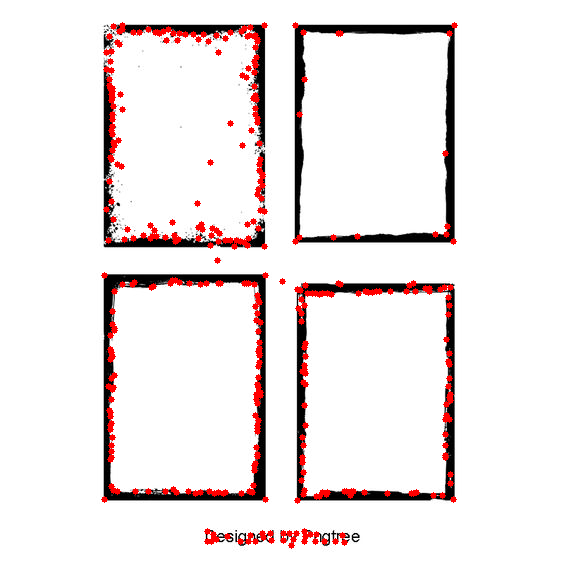

In [8]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def harris_corner_detection(image, threshold=0.01):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    corners = cv2.cornerHarris(gray, 2, 3, 0.04)
    # Threshold corner response
    corners_thresh = corners > threshold * corners.max()
    # Find centroids of corners
    ret, labels, stats, centroids = cv2.connectedComponentsWithStats(np.uint8(corners_thresh))
    # Draw red circles at corner locations
    for centroid in centroids:
        cv2.circle(image, (int(centroid[0]), int(centroid[1])), 3, (0, 0, 255), -1)
    return image

if __name__ == "__main__":
    # Load the image
    image = cv2.imread('door.jpg') #clear image with edges

    # Apply Harris Corner Detection
    corners_detected_image = harris_corner_detection(image)

    # Display the result
    cv2_imshow(corners_detected_image)

